# Summarize performance metrics

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import json

#plt.style.use("mpl_style.txt")
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight


In [ ]:
df = pd.read_csv("../results/metrics.csv")
df

,data,method,rho,knn
0,tasic,pca,92,2
1,tasic,mds,88,4
2,tasic,le,25,11
3,tasic,tsne,47,46
4,tasic,umap,53,25
5,tasic,phate,34,19
6,kanton,pca,88,2
7,kanton,mds,89,4
8,kanton,le,73,7
9,kanton,tsne,66,38


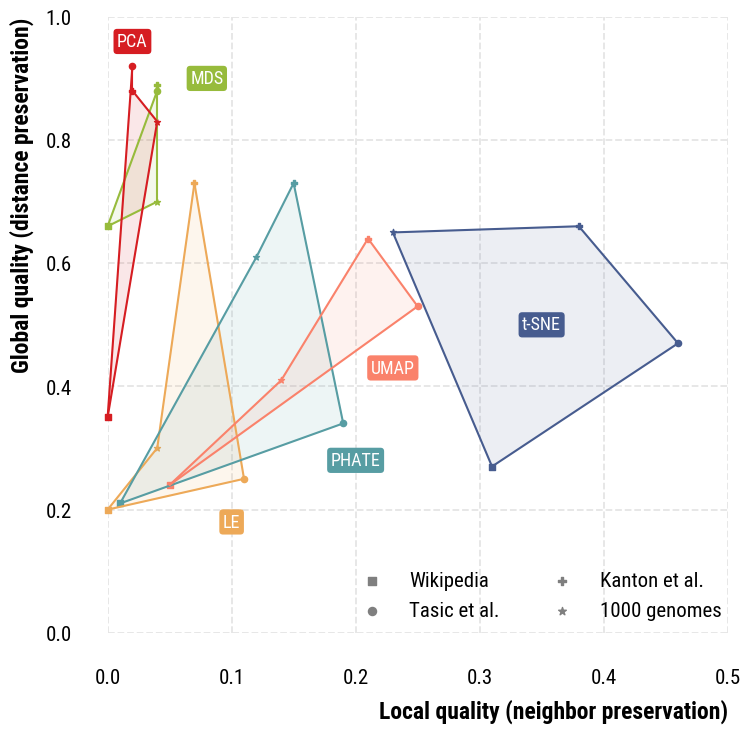

In [ ]:
markers = {
    "tasic": "o",
    "genomes": "*",
    "wiki": "s",
    "kanton": "P",
}


with open('method_colors.json', 'r') as f:
    base_colors = json.load(f)

colors = {
    "pca": base_colors["PCA (1901)"]['color'],
    "mds": base_colors["MDS (1938)"]['color'],
    "le": base_colors["Lapl. Eig. (2003)"]['color'], # Correct?
    "tsne": base_colors["t-SNE (2008)"]['color'],
    "umap": base_colors["UMAP (2018)"]['color'],
    "phate": base_colors["PHATE (2019)"]['color'],
}

labels = {
    "pca": "PCA",
    "mds": "MDS",
    "le": "LE",
    "tsne": "t-SNE",
    "umap": "UMAP",
    "phate": "PHATE",
}

labels_pos = {
    "pca": (0.02, 0.96),
    "mds": (0.08, 0.9),
    "le": (0.1, 0.18),
    "tsne": (0.35, 0.5),
    "umap": (0.23, 0.43),
    "phate": (0.2, 0.28),
}

plt.figure(figsize=(8,8))

for algorithm in np.unique(df.method):
    for dataset in np.unique(df.data):
        ind = (df.data == dataset) & (df.method == algorithm)
        if ind.sum() > 0:
            plt.scatter(
                df[ind].knn / 100,
                df[ind].rho / 100,
                c=colors[algorithm],
                marker=markers[dataset],
                s=20,
                clip_on=False,
            )

    ind = df.method == algorithm
    if np.sum(ind) > 2:
        for i in range(np.sum(ind)):
            if i == 0:
                # Start polygon
                x_poly = []
                y_poly = []
            x_poly.append(df[ind].knn.values[i] / 100)
            y_poly.append(df[ind].rho.values[i] / 100)
            if i == np.sum(ind) - 1:
                # Close and fill polygon
                plt.fill(x_poly, y_poly, color=colors[algorithm], alpha=0.1, clip_on=False)
            plt.plot(
                [
                    df[ind].knn.values[i] / 100,
                    df[ind].knn.values[(i + 1) % np.sum(ind)] / 100,
                ],
                [
                    df[ind].rho.values[i] / 100,
                    df[ind].rho.values[(i + 1) % np.sum(ind)] / 100,
                ],
                c=colors[algorithm],
                clip_on=False,
            )

        x = np.mean(df[ind].knn.values) / 100
        y = np.mean(df[ind].rho.values) / 100
        plt.text(
            *labels_pos[algorithm],
            labels[algorithm],
            ha="center",
            va="center",
            c="w",
            fontsize=13,
            bbox=dict(
                facecolor=colors[algorithm], edgecolor="none", boxstyle="round", pad=0.2
            )
        )

plt.xlim([0, 0.5])
plt.ylim([0, 1])
plt.xlabel("Local quality (neighbor preservation)")
plt.ylabel("Global quality (distance preservation)")

plt.gca().spines.left.set_position(("data", -0.025))
plt.gca().spines.bottom.set_position(("data", -0.05))

m1 = plt.scatter(0, 0, marker="s", color="tab:gray", s=20, label="Wikipedia")
m2 = plt.scatter(0, 0, marker="o", color="tab:gray", s=20, label="Tasic et al.")
m3 = plt.scatter(0, 0, marker="P", color="tab:gray", s=20, label="Kanton et al.")
m4 = plt.scatter(0, 0, marker="*", color="tab:gray", s=20, label="1000 genomes")
leg = plt.legend(frameon=False, ncol=2, bbox_to_anchor=(1.02, 0.06))
for m in [m1, m2, m3, m4]:
    m.set_visible(False)

plt.savefig("../figures/metrics.pdf", bbox_inches="tight")
plt.savefig("../figures/metrics.png", dpi=300, facecolor="white", bbox_inches="tight")